# Example Notebook 1: A Simple Ion Simulation
Here we provie a minimal working example of running an ion simulation of 6 ions.

In [20]:
"""
An example notebook that demonstrates a minimal working example for running an ion simulation
"""

import numpy as np
import os
from time import time

# Import all of the functions from simulation_module that we might need
from simulation_module import SimulationConfig, SimulationState, SimulationRunner, SimulationIO, SimulationVisualizer, AnimationMaker

# Import the Laser class from laser.py
from laser import Laser

In [21]:
# Initialize a 650 nm laser object
laser650 = laser650 = Laser(650, [1,0], saturation = 10, detuning = -2 * np.pi * 20 / 2, Gamma = 2 * np.pi * 20)

In [22]:
input_path = "input"
output_path = "output"

# Configure our simulation object with 6 ions, and gamma = 1.
config = SimulationConfig(
    N = 6,                        # number of ions
    w = 1.0,                      # frequency in the trap harmonic potential
    g = 1,                        # isotropy factor
    m = 137.327,                  # mass in atomic units
    T_mK = 0,                     # temperature in mK
    dt = 10**-3,                  # timestep
    num_steps = int(5*10**4),     # number of simulation steps
    damping = False,              # damping is turned off for now
    damping_parameter = 1.0,      # since damping is turned off, the strength of the damping parameter is not relevant
    langevin_temperature = False, # langevin_temperature is turned off for now (no random motion)
    lasers=[laser650],            # we only have one laser in the simulation, that is the 650 nm laser
    input_path = input_path,      # this is the file from where we will draw the starting ion configuration
    output_path = output_path     # this is where we will put all outputs
)

In [23]:
# We can save a short textfile that includes the simulation parameters 
config.save_shortform() # By default the filename will be "simulation_details.txt" which gets saved in the "output" folder

Now that we have initialized the simulation details, we would like to load a set of initial positions
and run the simulation

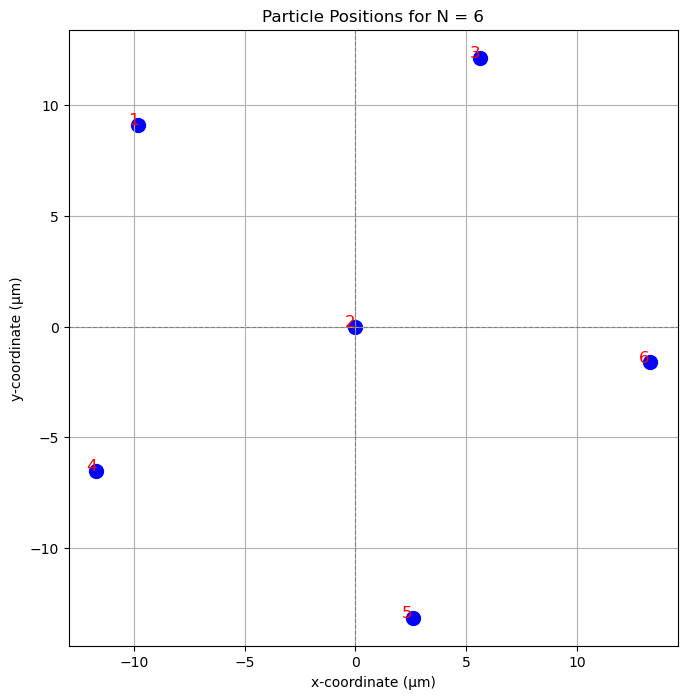

In [24]:
# Example test-file for initializing positions that is included with this Jupyter Notebook
filename = os.path.join(input_path, "6_1_positions_1.json")
assert os.path.exists(filename), f"File '{filename}' not found."

# Create the state object
state = SimulationState(config)

# Load initial positions into the state object
IO = SimulationIO()
state.initial_positions = IO.load_positions(filename)
state.positions = state.initial_positions
state.initialized = True

# Visualize the ion positions and save the results to file. Note that both 'save' and 'filename' are optional
SimulationVisualizer(save = True, filename = os.path.join(output_path, "my_ion_positions.jpg")).plot_positions(state) 

Now that we have initialized the ion positions, we would like to run the simulation.

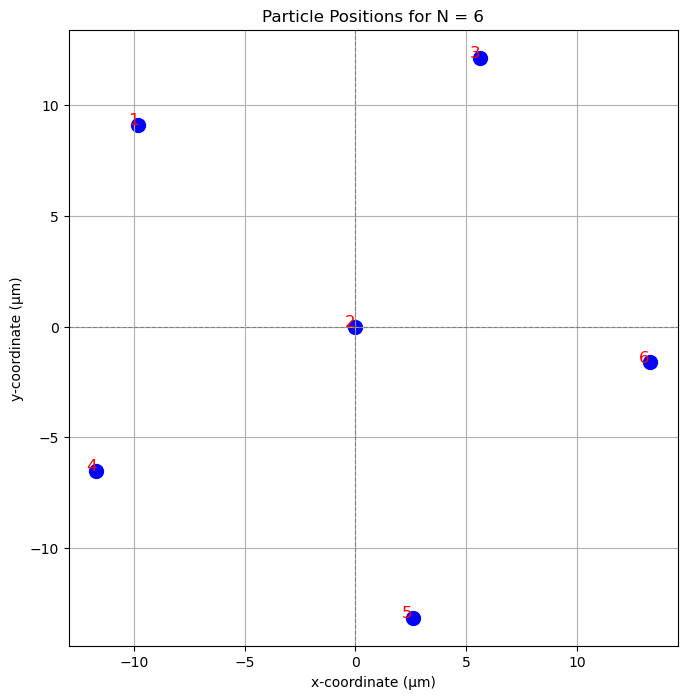

In [25]:
SimulationVisualizer().plot_positions(state)

In [26]:
# Initialize the runner object
runner = SimulationRunner(config, state)

# Run the simulation, which will update the state object. This takes about 5 seconds on my machine
start = time()
runner.run()
print(f"Time taken to run: {(time() - start):.3f} s")

Running with isotropy (γ) = 1.0000 for 50.0 μs
Time taken to run: 3.537 s


Now we can visualize the ion trajectory:

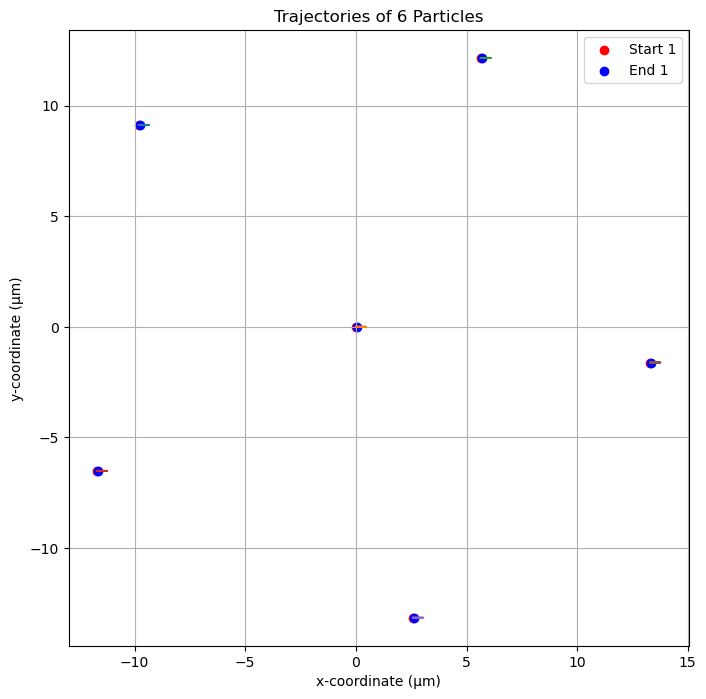

In [27]:
SimulationVisualizer().plot_trajectory(state)

Not much has happened! The ions move slightly, but not by very much. This is because we started the temperature of our simulation at 0 mK, and the positions we loaded were already at the global minimum energy stable configuration. To see a little bit more action, let's increase the temperature and run it again.

Running with isotropy (γ) = 1.0000 for 50.0 μs
Time taken to run: 3.499 s


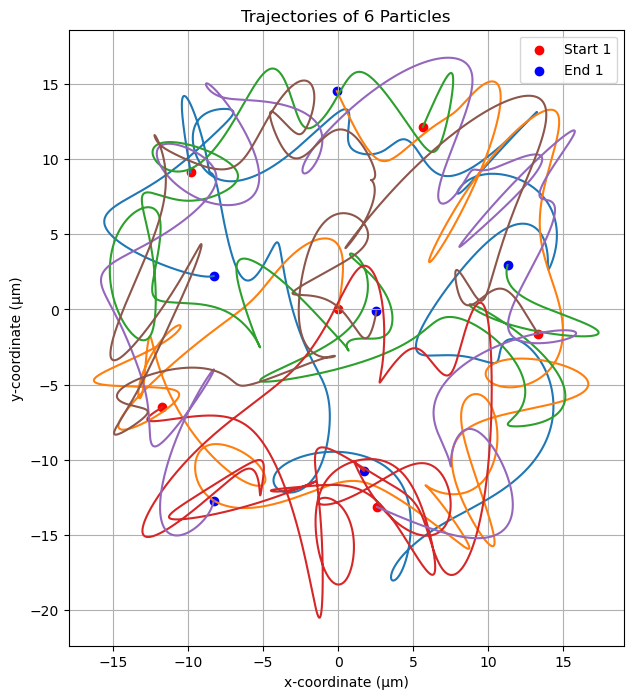

In [28]:
state.reset() # Reset to initial positions, if we didn't do this, we would evolve from the last position of the previous run
config.T_mK = 300 # Set the new temperature
runner = SimulationRunner(config, state)

# Run the simulation. This takes about 5 seconds on my machine
start = time()
runner.run()
print(f"Time taken to run: {(time() - start):.3f} s")

# Now when we visualize the trajectory, we see some more ion motion
SimulationVisualizer().plot_trajectory(state)

Try running the above cell with different values of initial temperature. Notice that for small temperatures, less than about 10 mK the ions often remain localized to their initial positions, for higher temperatures, around 20 mK, the outer ring of 5 ions begins to 'melt' into each other.

After having played around with changing the temperature, go back to config.T_mK = 10 for a moment and run the above cell again so that we can explore some other ways to visualize the trajectory by plotting a density map

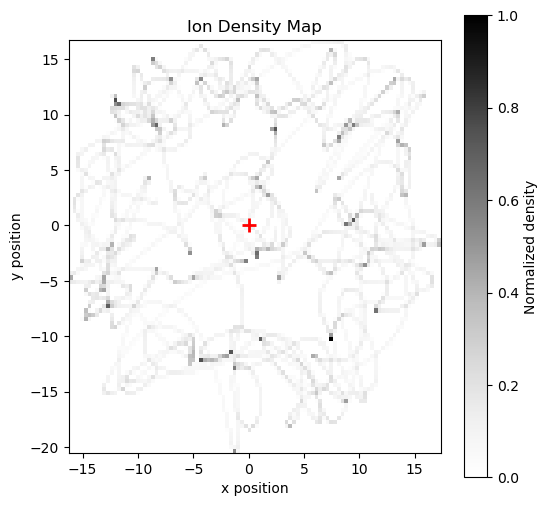

In [30]:
# Plot an ion density map instead of a trajectory
SimulationVisualizer().plot_density_map(state)